In [11]:
import pandas as pd

df = pd.read_csv('2018년데이터.csv', encoding = 'euc_kr')
# df.set_index(['소재지'], inplace = True)
df.drop(['주택수', '아파트수'], axis = 1, inplace = True)

In [12]:
df

,소재지,WiFi 접속자수,자동차등록수,사업체수,총인구수,세대수,면수
0,한림읍,420383.0,12431,2174,25003,10204,53
1,애월읍,695233.0,22053,2514,36550,15563,36
2,구좌읍,534957.0,9112,1738,16283,7670,4
3,조천읍,863303.0,13781,1873,24718,10538,175
4,한경면,271661.0,5743,720,9447,4657,0
5,추자면,NaN,822,214,2149,1049,0
6,우도면,95615.0,1223,305,1892,999,38
7,일도1동,356614.0,1086,1326,2993,1623,486
8,일도2동,1524817.0,14907,2210,34684,13187,690
9,이도1동,584394.0,3211,1532,7989,3677,592


In [8]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
model = KMeans(n_clusters=2, init='random', n_init = 1, max_iter = 1, random_state=1)

In [18]:
df.fillna(0, inplace = True)

In [19]:
model.fit(df.iloc[:,1:])

KMeans(init='random', max_iter=1, n_clusters=2, n_init=1, random_state=1)

In [20]:
model.cluster_centers_

array([[1.55828314e+06, 4.32548571e+04, 3.02928571e+03, 3.70922857e+04,
        1.46300000e+04, 9.61000000e+02],
       [3.74219737e+05, 7.75142105e+03, 1.10794737e+03, 1.27444737e+04,
        5.37952632e+03, 3.55105263e+02]])

In [25]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1])

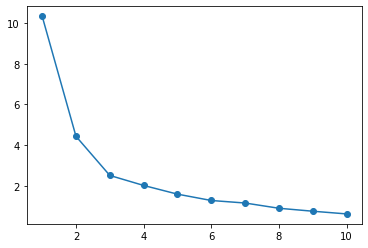

In [32]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
minmaxdata= scaler.fit_transform(df.iloc[:,1:])

kmlist = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='random', random_state=42)
    km.fit(minmaxdata)
    
    kmlist.append(km.inertia_)
plt.plot(range(1,11), kmlist, marker='o')
# 군집 중심에서 각 클러스터 내 점 거리 합산
plt.show()


In [36]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

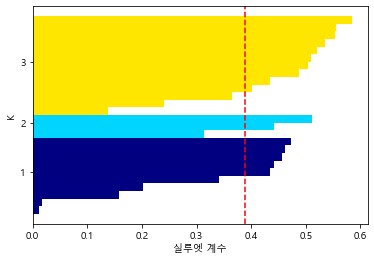

NameError: name 'dataR_pca' is not defined

In [37]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.metrics.cluster import silhouette_score
import numpy as np

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()
    
k = 3
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(minmaxdata)
plotSilhouette(minmaxdata, y_km)
silhouette_score(dataR_pca,y_km)